# Callisto Data Quality Analysis for SVHN

### Dependencies
* Python 3
* Pickle
* Matplotlib
* Keras
* Numpy
* h5py

In [1]:

from keras.datasets import mnist
import matplotlib.pyplot as plt
import _pickle as pickle
from keras.utils import to_categorical
import numpy as np
import h5py


Using TensorFlow backend.


### Please download the SVHN data [here](https://drive.google.com/file/d/1Zxz1QC5ZD6eREwLfjv1NVdUaZxV0hp4U/view?usp=sharing) and save it in the "data" folder under SVHN

### You <span style="color:red">**need**</span> to download this file. It is not part of the github repo

### MD5 checksum = 2511787cf63e6d9d4495eafd120d701e

In [2]:
# Open the file as readonly
h5f = h5py.File('../data/SVHN_grey.h5', 'r')

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
x_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]


# Close this file
h5f.close()

print('Training set', x_train.shape, y_train.shape)
print('Validation set', x_val.shape, y_val.shape)
print('Test set', x_test.shape, y_test.shape)

Training set (63733, 32, 32, 1) (63733, 10)
Validation set (9524, 32, 32, 1) (9524, 10)
Test set (26032, 32, 32, 1) (26032, 10)


### all_train_acts.pickle contains all the activations of the training data. This is necesscary for Callisto to calculate the shannon indices of the image input. Please download the file [here](https://drive.google.com/file/d/1PGVjDtV-vJJHz9QEjkIUpWPMNaTbGQpd/view?usp=sharing). The file should be saved in the "saved_pickles" folder SVHN

### If you have downloaded this file as part of the GitHub repo, it should be downloaded automatically

### MD5 Sum = fad8fea2d32f180a9acf102968f96f3e

In [3]:
with open('../saved_pickles/all_train_acts.pickle', 'rb') as handle: 
     all_acts = pickle.load(handle)

In [4]:
# This function calculates the Shannon index for all the inputs
def shannon(arrs):
    shannons = []
    for arr in arrs:
        sum = 0
        for i in arr:
            sum += (i*np.log(i))
        shannons.append(sum * -1.0)
    return shannons

In [5]:
all_shannons = shannon(all_acts)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in float_scalars
  import sys


In [6]:
low_shannon_false = []
for i in range(len(all_shannons)):
    if all_shannons[i] < 0.01 and np.argmax(all_acts[i]) != np.argmax(y_train[i]) : 
        low_shannon_false.append(i)
        
print("Number of Low Entropy, but false images:", len(low_shannon_false))

Number of Low Entropy, but false images: 129


### L: Label of the image, P: prediction of the model. The number in between is the index of the data point in the MNIST dataset

### Low Entropy (The model is fairly certain of the prediction), but the prediction for these images is incorrect. 

### Intuitively, this may mean that the data may be mislabelled [1]. This can be seen prominently in 4888, 24364, 4296 and 4622

#### References
* [1] Jiangwen Sun, Feng-ying Zhao, Chong-Jun Wang, and Shifu Chen. Identifying and correcting mislabeled training instances. *In Future Generation Communication and Networking, FGCN 2007, Ramada Plaza Jeju, Jeju-Island, Korea, December 6-8, 2007, Proceedings, pages 244  250, 2007*. URL: https://doi.org/10.1109/FG 

Low Entropy (The model is fairly certain of the prediction), but false images.


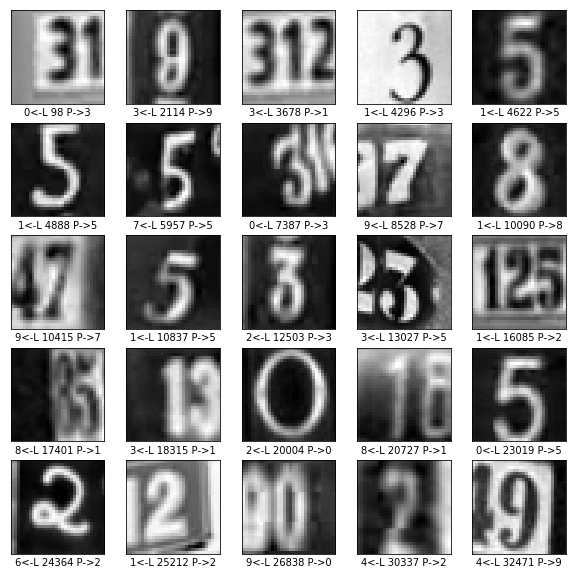

In [7]:
plt.figure(figsize=(10,10))
offset = 0

print("Low Entropy (The model is fairly certain of the prediction), but false images.")
for i in range(min(25, len(low_shannon_false))):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[low_shannon_false[i + offset]].reshape(32,32), cmap=plt.cm.binary)
    plt.xlabel(str(np.argmax(y_train[low_shannon_false[i + offset]])) + "<-L "  + str(low_shannon_false[i]) +" P->" + str(np.argmax(all_acts[low_shannon_false[i + offset]])))
plt.show()



Prominent examples of potential mislabelleing


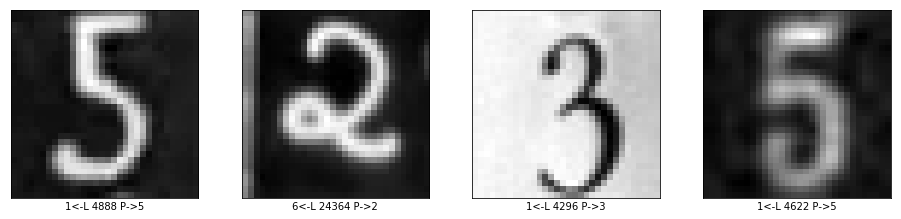

In [8]:
prominent_examples = [4888, 24364, 4296, 4622]
plt.figure(figsize=(20,20))
offset = 0

print("Prominent examples of potential mislabelleing")
for i in range(min(25, len(prominent_examples))):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[prominent_examples[i + offset]].reshape(32,32), cmap=plt.cm.binary)
    plt.xlabel(str(np.argmax(y_train[prominent_examples[i + offset]])) + "<-L "  + str(prominent_examples[i]) +" P->" + str(np.argmax(all_acts[prominent_examples[i + offset]])))
plt.show()
